In [1]:
import geopandas as gpd
import laspy
from shapely.geometry import box
import matplotlib.pyplot as plt
import contextily as ctx
from glob import glob
import os

In [ ]:
transform_area='hwy_21'
buffer_meters = 15
dirname =  os.path.abspath('../data/results/')
path = os.path.abspath('../transform_area/'+transform_area+'/*.shp')
for filename in glob(path):
    # Read in transform area (ice roads)
    gdf = gpd.read_file(filename)
    # Buffer geom based on user input
    gdf['geometry'] = gdf.geometry.buffer(buffer_meters)
    # Save buffered shpfile to directory we just made
    # gdf.to_file(dirname+'/buffered_area.shp')

In [2]:
buf = gpd.read_file('/Users/zachkeskinen/Documents/ice-road-copters/test/mcs-data/ice-road/results/buffered_area.shp')

In [9]:
with laspy.open('/Users/zachkeskinen/Documents/ice-road-copters/test/mcs-data/ice-road/results/clipped_PC.laz') as f:
    hdr = f.header

<AxesSubplot:>

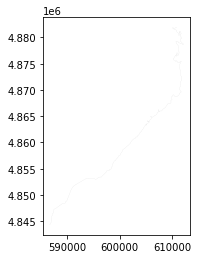

In [8]:
buf['geometry'].plot(linewidth = 100, color = 'black')

In [5]:
import rioxarray as rxa
dem = '/Users/zachkeskinen/Documents/ice-road-copters/test/mcs-data/ice-road/results/ref_PC.tif'
d = rxa.open_rasterio(dem)

In [6]:
d.plot()

<AxesSubplot:>

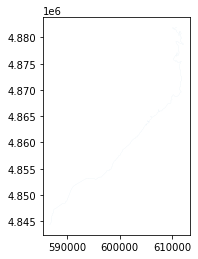

In [3]:
buf.plot()

In [16]:
import fiona
from shapely.geometry import mapping
import os
# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}
# Write a new Shapefile
with fiona.open(os.path.expanduser('~/Downloads/laztest.shp'), 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(laz_box),
        'properties': {'id': 123},
    })
# type(laz_box)

<AxesSubplot:>

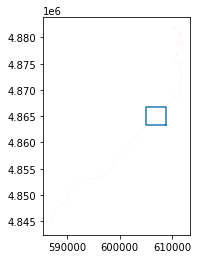

In [11]:
with laspy.open('/Users/zachkeskinen/Documents/ice-road-copters/test/mcs-data/ice-road/results/clipped_PC.laz') as f:
    hdr = f.header
f, ax = plt.subplots()
laz_box = box(hdr.x_min, hdr.y_min, hdr.x_max, hdr.y_max)
x,y = laz_box.exterior.xy
ax.plot(x,y)
buf.plot(ax = ax, color = 'red')
# d.plot(ax = ax)
# ctx.add_basemap(ax = ax, crs = buf.crs)